# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 i
f the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [67]:
#Q1.1
import pandas as pd 

df_airbnb = pd.read_csv("../undergrad_ml/data/airbnb_NYC.csv", encoding='latin-1')

print(df_airbnb["Price"].str.contains(",").sum()) # there are 181 commas in price column
print(df_airbnb["Price"].str.contains("\$").sum()) # there are 30478 dollar signs in price column




df_airbnb["Price"] = df_airbnb["Price"].replace({"\$": "", ",": ""}, regex=True)
print(df_airbnb["Price"].str.contains(",").sum()) # there are 0 commas in price column
print(df_airbnb["Price"].str.contains("\$").sum()) # there are 0 dollar signs in price column
df_airbnb["Price"] = df_airbnb["Price"].astype(int)
print(df_airbnb["Price"].isna().sum()) # there are 0 missing values in price column


higher_prices = df_airbnb[df_airbnb["Price"] > 999]
print(len(higher_prices)) #there are 181 airbnbs that are over $999
print(higher_prices.head())



181
0
0
0
0
181
      Host Id Host Since                                 Name Neighbourhood   \
101      8730  2/27/2009                Comfort & Convenience      Manhattan   
263     34915  8/30/2009  Luxurious 2-Floor Manhattan Mansion      Manhattan   
764    112879  4/23/2010  Modern Luxury Meets Old Money Charm       Brooklyn   
1272   214148  8/26/2010     LARGE, COMFY 1BDR W/CHARACTER!!!       Brooklyn   
1275   213266  8/26/2010   Beautiful 1 Bedroom in Nolita/Soho      Manhattan   

     Property Type  Review Scores Rating (bin)        Room Type  Zipcode  \
101    Condominium                       100.0  Entire home/apt  10003.0   
263      Apartment                         NaN  Entire home/apt  10075.0   
764      Apartment                         NaN  Entire home/apt  11206.0   
1272     Apartment                        90.0  Entire home/apt  11216.0   
1275     Apartment                        75.0  Entire home/apt  10012.0   

      Beds  Number of Records  Number Of Revie

In [ ]:
#Q1.2

df_police = pd.read_csv("../undergrad_ml/data/mn_police_use_of_force.csv")


print(df_police["subject_injury"].head()) #we can already see missing values 
print( df_police["subject_injury"].shape) #there are 12925 rows in the subject_injury column

print(df_police["subject_injury"].isna().sum()) #there are 9848 missing values out ot the 12925 rows in survey injury column

print(df_police["subject_injury"].value_counts()) #there are 1631 "Yes" and 1446 "No" values in the subject_injury column 
                                                  #(total is 3077 non-missing values) which tracks with the number of total rows 
                                                  #and missing values. 

df_police["subject_injury"] = df_police["subject_injury"].fillna("Missing")
df_police.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: subject_injury, dtype: object
(12925,)
9848
subject_injury
Yes    1631
No     1446
Name: count, dtype: int64


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
#Q1.2 continued
table = pd.crosstab(df_police["subject_injury"], df_police["force_type"])
table
#there is a large number of missing values for bodily force and chemical irritant which may be
#seen as less severe/frequent types of forces compared to firearm, lethal weapons, etc.
#Maybe people are less likely to fully report these less severe types of forces. 

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [ ]:
#Q1.3

df_metabric = pd.read_csv("../undergrad_ml/data/metabric.csv")

print(df_metabric["Overall Survival Status"].head())
print(df_metabric["Overall Survival Status"].value_counts())

df_metabric["Overall Survival Status"] = df_metabric["Overall Survival Status"].replace("1:DECEASED", 0).replace("0:LIVING", 1)

print(df_metabric["Overall Survival Status"].head())

0      0:LIVING
1    1:DECEASED
2      0:LIVING
3    1:DECEASED
4    1:DECEASED
Name: Overall Survival Status, dtype: object
Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64
0    1
1    0
2    1
3    0
4    0
Name: Overall Survival Status, dtype: int64


/tmp/ipykernel_2329/712077508.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_metabric["Overall Survival Status"] = df_metabric["Overall Survival Status"].replace("1:DECEASED", 0).replace("0:LIVING", 1)


In [ ]:
#Q1.4

print(df_airbnb["Review Scores Rating"].isna().sum()) #there are 8323 missing values in this column

median_score = df_airbnb["Review Scores Rating"].median()
print(median_score) #median is 94

df_airbnb["Review_Scores_Imputed"] = df_airbnb["Review Scores Rating"].fillna(median_score)

#Replacing missing values with the median score of the non-missing observations may result in bias
#because it is assuming that those missing values follow the typical trend that the rest of the data
#is following. This may not be the case, and therefore may create an inaccurate median of all the 
#data. 

8323
94.0


np.float64(94.0)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [201]:
#Q2.1

df_shark = pd.read_excel("../undergrad_ml/data/GSAF5.xls")

#pandas has a function read_excel that works for reading 
#excel files. I needed to pip install xlrd as well onto
#my computer in order for it to work.

In [202]:
#Q2.2
df_shark.nunique() #I used this function to see if there were 
                    #any columns with 0 or 1 unique value so 
                    #I could inspect if it was nas. 
                    #I found that Unnamed: 21 had one unique value
                    #and Unnamed: 22 had two. 

print(df_shark["Unnamed: 21"].value_counts()) #this column only mostly na values
                                            #just one value that is "stopped here"

print(df_shark["Unnamed: 22"].value_counts()) #this column has mostly na values
                                            #two values not na were "Teramo" and 
                                            #"change filename" (could be notes to 
                                            #the side of table)


df_shark = df_shark.drop(columns=["Unnamed: 21", "Unnamed: 22"])

Unnamed: 21
stopped here    1
Name: count, dtype: int64
Unnamed: 22
Teramo             1
change filename    1
Name: count, dtype: int64


In [203]:
#Q2.3

#An observation is a row in a dataframe. Each row is 
#one singular vector of data that contains all the 
#inforation about a particular entry. In this dataset, 
#each observation/row is a single shark attack event
#with each column describing that event's information. 
#e.g. date, location, injury, species, etc.

#When I am cleaning data and I see that a column only has
#a couple missing values, I would not just remove the entire
#column because there is still useful information that 
#describes the other observations with values in that column. 
#However, if a column has a large number of missing values,
#it may be better to remove the entire column because it
#may not provide enough information to see patterns throughout
#the entire dataset. 

<class 'pandas.core.series.Series'>
RangeIndex: 7074 entries, 0 to 7073
Series name: Year
Non-Null Count  Dtype  
--------------  -----  
7072 non-null   float64
dtypes: float64(1)
memory usage: 55.4 KB
0


<Axes: xlabel='Year', ylabel='Count'>

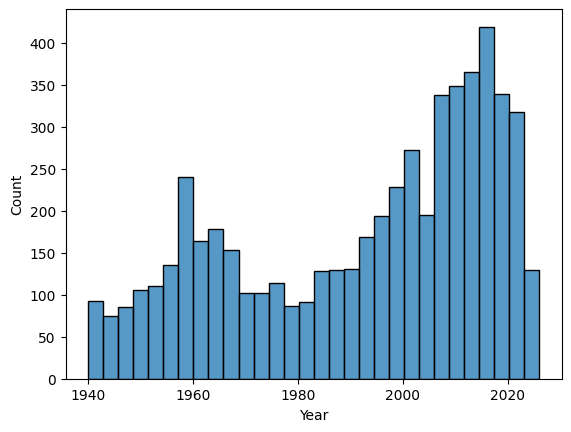

In [204]:
#Q2.4

df_shark["Year"].info() #year is currently float64
df_shark["Year"].head() #years are in decimal format (e.g. 2026.0)
df_shark["Year"] = df_shark["Year"].astype("Int64") #changing to Int64, not int 
                                                    #because there are missing values
df_shark["Year"].isna().sum() #there are 2 missing values in year column
df_shark[df_shark["Year"].isna()] #row 927 has Date saying 2017 so we can keep that data
                                        #but drop row 6842 because its from the 1836s

df_shark.loc[927,"Year"] = 2017 #filling missing year from row 927 with 2017


df_shark = df_shark[df_shark["Year"]>1939] #filtering rows to be since 1940
print(df_shark["Year"].isna().sum())

sns.histplot(data=df_shark, x="Year", bins=30) #from the histograom, we can see that 
                                                #shark attack REPORTINGS have increased
                                                # significantly from 1940, and specifically
                                                # since the '90s. 

<class 'pandas.core.series.Series'>
Index: 5539 entries, 0 to 5539
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
3762 non-null   object
dtypes: object(1)
memory usage: 86.5+ KB


<Axes: xlabel='Age_Clean', ylabel='Count'>

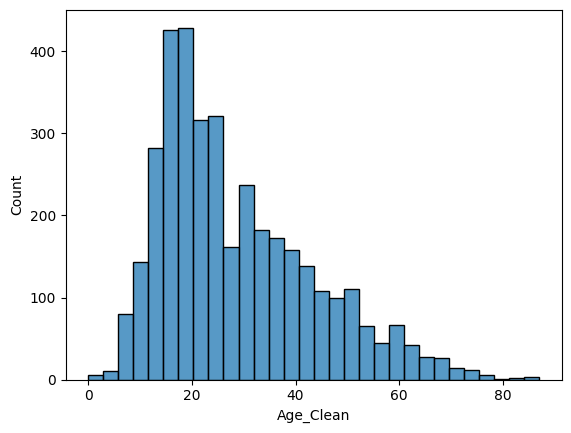

In [205]:
#Q2.5

df_shark["Age"].info() #from this I can see that Age is an object type, not int
df_shark["Age"].unique() #there are many things wrong with this column



#first I took out all the values that had no numbers in them at all, they are now na
df_shark["Age"] = df_shark["Age"].replace(['Middle age', 'teen', 'Teen', 'M', '!!',
                                        'a minor', 'Teens', '\xa0 ', ' ', 'Elderly', 
                                        'adult', '(adult)', 'X', '"middle-age"', 
                                        'MAKE LINE GREEN', '"young"', '?'], np.nan) 



#I wanted to redefine what an observation is so that each row would be a single victim
#because there are rows with nultiple victims. But for this assignment I will just drop these rows
''' 
df_shark["Age_Clean"] = df_shark["Age"].astype(str).replace({" ": "", "&": ",", "and": ","}, regex=False)
df_shark["Age_Clean"] = df_shark["Age_Clean"].str.split(',')
df_victims = df_shark.explode('Age_Clean')


df_victims['Age_Clean'] = pd.to_numeric(df_victims['Age_Clean'], errors='coerce')


print(df_victims[['Date', 'Age', 'Age_Clean']].loc[[2251, 4741]])

'''


df_shark_clean = df_shark[~df_shark["Age"].astype(str).str.contains(r',|&|and', na=False)].copy()
df_shark_clean["Age_Clean"] = df_shark_clean["Age"].astype(str)


#18 months is now 1 year old
df_shark_clean.loc[df_shark_clean["Age_Clean"].str.contains("18 months", na=False), "Age_Clean"] = "1"

#ages younger than 1 year are now 0 years old
df_shark_clean.loc[df_shark_clean["Age_Clean"].str.contains("months", na=False), "Age_Clean"] = "0"


df_shark_clean["Age_Clean"] = pd.to_numeric(df_shark_clean["Age_Clean"].str.extract(r'(\d+)', expand=False), errors='coerce')



df_shark_clean["Age"].isna().sum() #there are 1825 missing values in Age column




df_shark_age_clean = df_shark_clean.dropna(subset=["Age_Clean"]).copy() #unsure if I should drop all
                                                                    #rows with missing age data 
                                                                    #because that is half of my
                                                                    #data, but i want to see the 
                                                                    #age trend with the information
                                                                    #that I do have. 
df_shark_age_clean["Age_Clean"] = df_shark_age_clean["Age_Clean"].astype(int)



sns.histplot(df_shark_age_clean, x="Age_Clean", bins=30) 


In [208]:
#Q2.6
df_shark["Type"].value_counts()

df_shark["Type"] = df_shark["Type"].replace({"unprovoked": "Unprovoked", " Provoked": "Provoked"})
df_shark["Type"] = df_shark["Type"].replace({"Invalid": np.nan, "Watercraft": np.nan,
                                           "Questionable": np.nan, "Boat": np.nan, 
                                           "Sea Disaster": np.nan, "?": np.nan, 
                                           "Unconfirmed": np.nan, "Unverified": np.nan, 
                                           "Under investigation": np.nan})

df_shark["Type"].value_counts()

#4126 are unprovoked out of 4649, meaning there are 523 provoked

Type
Unprovoked    4126
Provoked       523
Name: count, dtype: int64

In [ ]:
#Q2.7

df_shark["Fatal Y/N"].value_counts() #values that are not Y, N, or Unknown are F, M, n, Nq, 2017, Y x 2
df_shark["Fatal Y/N"] = df_shark["Fatal Y/N"].replace({'F': np.nan, 'M': np.nan, 
                                                       'n': 'N', 'Nq': np.nan, 
                                                       2017: np.nan, 'Y x 2': 'Y', " N": 'N'}) #got rid of incorrect not, 
                                                                                               #understandable values, 2017
                                                                                               #was an int not string

df_shark["Fatal Y/N"].value_counts()


Fatal Y/N
N          4230
Y           828
UNKNOWN      45
Name: count, dtype: int64

In [ ]:
#Q2.8 

pd.crosstab(df_shark["Type"], df_shark["Fatal Y/N"])

#This crosstab shows that there are 3373 unprovoked shark attacks that are not fatal compared
#to 499 provoked shark attacks that are not fatal. There are 692 unprovoked shark attacks that 
#are fatal compated to 13 provoked shark attacks that are fatal. This shows that unprovoked shark 
#attacks are more likely to occur, as well as be more fatal than provoked shark attacks.
#This may be because unprovoked shark attacks are more unexpected and therefore the victim
#is less ready to defend themselves or get help quickly.

Fatal Y/N,N,UNKNOWN,Y
Type,,,
?,1,0,0
Boat,7,0,0
Invalid,15,0,7
Provoked,499,3,13
Questionable,14,0,8
Sea Disaster,49,0,105
Under investigation,1,0,0
Unprovoked,3373,36,692
Unverified,1,0,0


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

##### Q3.1 
The article is about data tidying and research done about how to structure cleaning data so that we can better use, manipute, and visualize the trends in data. 

##### Q3.2

Tidy data standard is meant to be a consistent, and reuseable structure that data scientist can use ever time they are cleaning data. 

##### Q3.3

“Like families, tidy datasets are all alike but every messy dataset is messy in its own way.” <br>
This means that the tidy structure should be one consistent method, but messy datasets mess this up as they are unstructured. 

“For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.” <br>

This means that when we are looking at a dataset, we can tell what the variables and observations are. 


##### Q3.4

Variable - one feature measured repeatedly for each row

<br>

Observation - a row that has all the measurements taken to describe the row

<br>

value - this is one cell of information from the dataset

##### Q3.5

1. Column headers are values, not variable names.
2. Multiple variables stored in one column.
3. Variables stored in both rows and columns.
4. Multiple types of observational units in the same table.
5. One observational unit spread across multiple tables.
git remote -v
Data is messy because of the income categories. 


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

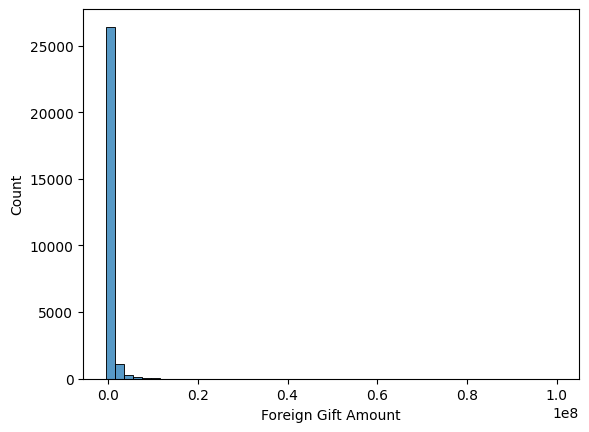

In [ ]:
#Q4.1
import seaborn as sns

df_gifts = pd.read_csv("../undergrad_ml/data/ForeignGifts_edu.csv")
print(df_gifts.head())

print(df_gifts["Foreign Gift Amount"].value_counts()) #currently object type

#Q4.2
sns.histplot(df_gifts["Foreign Gift Amount"], bins=50)
#There seems to be a large number of gifts that are a low number, whereas there are very 
#few gifts that are a very high number. The distribution is skewed right.


Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


<Axes: xlabel='Gift Type', ylabel='Count'>

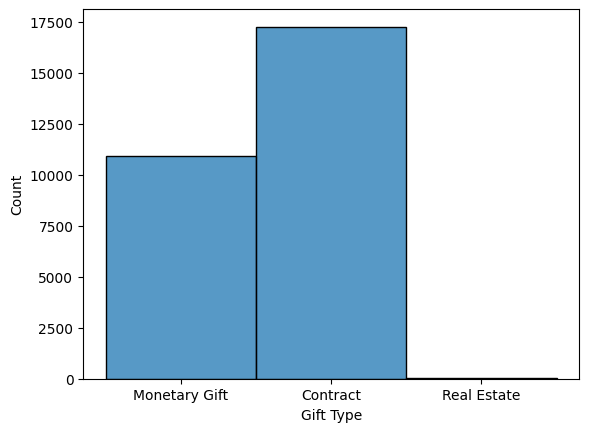

In [209]:
#Q4.3
print(df_gifts["Gift Type"].value_counts())
sns.histplot(df_gifts["Gift Type"], bins=50)
#There are 11 real estate gifts, 10,936 monetary gifts, and 17,274 contract gifts. 


In [219]:
#Q4.4

print(df_gifts.groupby(["Country of Giftor"])["Country of Giftor"].count().sort_values(ascending=False).head(15))
#England, China, Canada, Japan, Switzerland, Saudi Arabia, France, Germany, 
#Hong Kong, South Korea, Quatar, The Netherlands, Korea, Indian, Taiwan are 
#the top 15 countries by number of gifts given.


df_gifts.groupby(["Country of Giftor"]).sum("Foreign Gift Amount").sort_values("Foreign Gift Amount", ascending=False).head(15)

#Qatar, England, China, Saudi Arabia, Bermuda, Canada, Hong Kong, 
#Japan, Zwitzerland, India, Germany, United Arab Emirates, France,
#Singapore, and Australia are the top 15 countries by total foreign
#gift amount.

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Country of Giftor, dtype: int64


,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount
Country of Giftor,,,,
QATAR,14133760,207860000,29707239,2706240869
ENGLAND,47713393,861644700,156432837,1464906771
CHINA,33468243,601615400,105733871,1237952112
SAUDI ARABIA,20193035,355691800,69276531,1065205930
BERMUDA,2126107,31117600,5021524,899593972
CANADA,28437385,499182200,100285503,898160656
HONG KONG,14000547,244471700,46351589,887402529
JAPAN,22888812,475343200,81187641,655954776
SWITZERLAND,29044550,482048700,71959519,619899445


<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

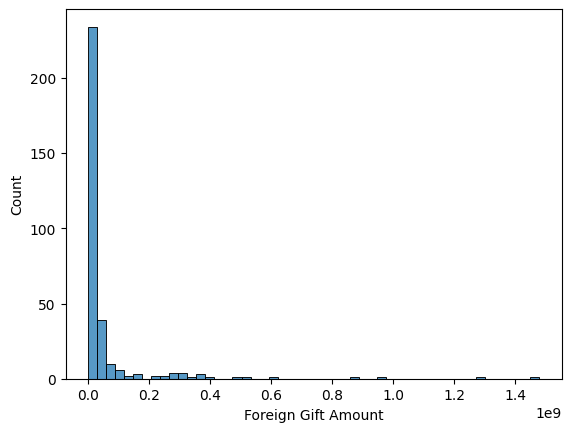

In [228]:
#Q4.5 

df_gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
#Cargill, Cornell University, Harvard University, Massachusetts Institute of Technology, Yale University,
# Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown University,
#University of Chicago, University of Colorado Boulder, Duke University, Brigham Young University, 
# Stanford University, University  of Texas MD Anderson Cancer Center are the top 15 institutions
# by total foreign gift amount.

sns.histplot(df_gifts.groupby(["Institution Name"]).sum("Foreign Gift Amount")["Foreign Gift Amount"], bins=50)

In [227]:
#Q4.6
df_gifts.groupby(["Giftor Name"]).sum("Foreign Gift Amount").sort_values("Foreign Gift Amount", ascending=False).head(15)

#Qatar Foundation is the top giftor with a total foreign fit amount of 1,166,503,744

,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount
Giftor Name,,,,
Qatar Foundation,6230548,89110300,11199907,1166503744
Qatar Foundation/Qatar National Res,196298,2711000,425002,796197000
Qatar Foundation for Education,138404,1942000,257508,373945215
Anonymous,5698993,79905200,11294891,338793629
Saudi Arabian Cultural Mission,7422014,136674400,20713305,275221475
HCL,139675,10566700,208835,190000000
Church of Jesus Christ of LDS,124928,1743400,301225,185203715
Emirates Institute for Advanced Sc,245229,3288000,1032913,170641244
QIC,33297,439800,87622,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [26]:
#Q5.1

df_college = pd.read_csv("../undergrad_ml/data/college_completion.csv")

#Q5.2
print(df_college.head())
print(df_college.shape) # there are 3798 rows and 63 columns in this dataset

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

In [28]:
#Q5.3
pd.crosstab(df_college["control"], df_college["level"])

#I notice that private not for profit institutions have a much higher number of 
#4-year instititions and very few 2-year options. Whereas private for profit and 
#pulic institutions have a much more even distribution of 2-year and 4-year options
#in comparison with private not for profit institutions.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: xlabel='grad_100_value', ylabel='Density'>

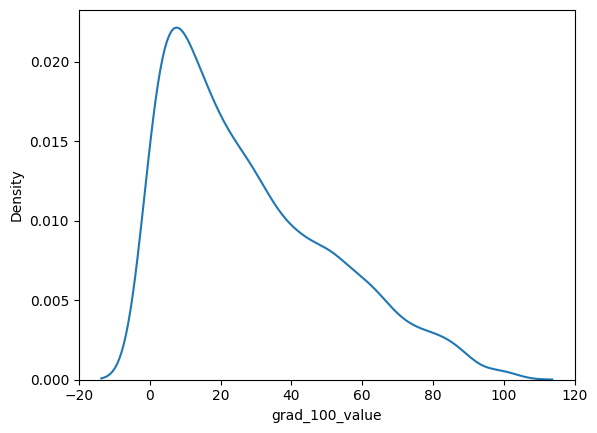

In [38]:
#Q5.4
sns.kdeplot(df_college, x = "grad_100_value")

#this kde plot shows that the highest density of graduation rates is 10% and 
#the range of graduation rates that extends from 0 to 100%. As we approach 100% 
#after reaching 10% it significantly decreases in density.

<Axes: xlabel='grad_100_value', ylabel='Density'>

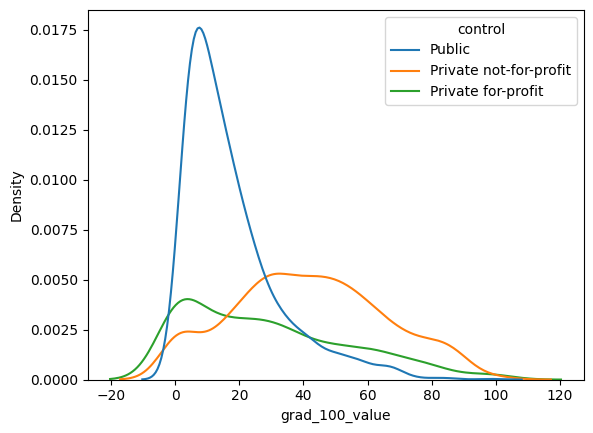

In [40]:
#Q5.4 continued
sns.kdeplot(df_college, x="grad_100_value", hue = "control")


#the graph shows that private not for profit institutions have the highest graduation rates
#however their distribution is more spread out than the other two types of institutions.
 

#4. For `grad_100_value`, create a kernel density plot and describe table.
#  Now condition on `control`, and produce a kernel density plot and describe 
# tables for each type of institutional control. Which type of institution appear
#  to have the most favorable graduation rates?



covariance:  88610.48316902434
correlation:  0.5758792845936075


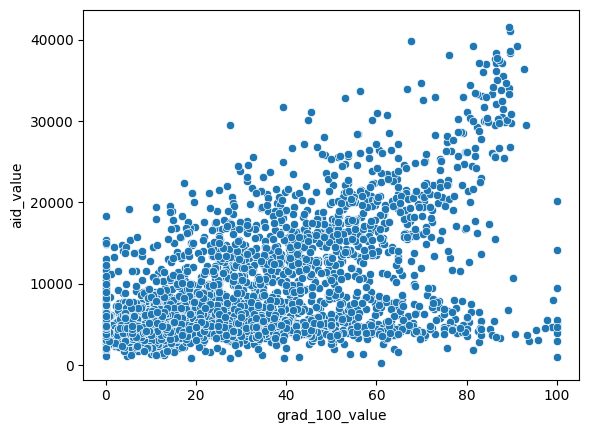

In [42]:
#Q5.5

sns.scatterplot(data=df_college, x="grad_100_value", y="aid_value")

covariance = df_college["grad_100_value"].cov(df_college["aid_value"])
correlation = df_college["grad_100_value"].corr(df_college["aid_value"])
print("covariance: ", covariance)
print("correlation: ", correlation)


#5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute 
# the covariance and correlation between the two variables. Describe what
#  you see. Now make the same plot and statistics, but conditioning on 
# `control`. Describe what you see. For which kinds of institutions does 
# aid seem to vary positively with graduation rates?


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

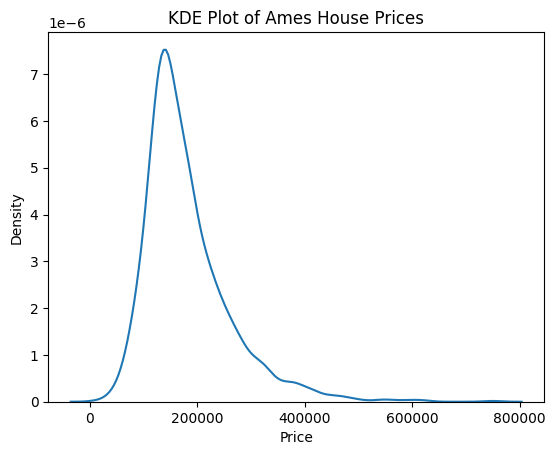

              max           var
Bldg.Type                      
1Fam       755000  6.859451e+09
TwnhsE     392500  4.381346e+09
Twnhs      280750  1.758874e+09
Duplex     269500  1.560169e+09
2fmCon     228950  9.665408e+08


In [253]:
#Q7.1
df_ames = pd.read_csv("../undergrad_ml/data/ames_prices.csv")

#Q7.2
df_ames.describe()
sns.kdeplot(df_ames, x = "price") 

plt.title("KDE Plot of Ames House Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

summary = df_ames.groupby('Bldg.Type')['price'].agg(["max", "var"]).sort_values("max", ascending=False)
print(summary)
#The most expenstive building type on average is TwnhsE, and highest var is 1Fam. 


/tmp/ipykernel_1080/887051964.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Building Type')


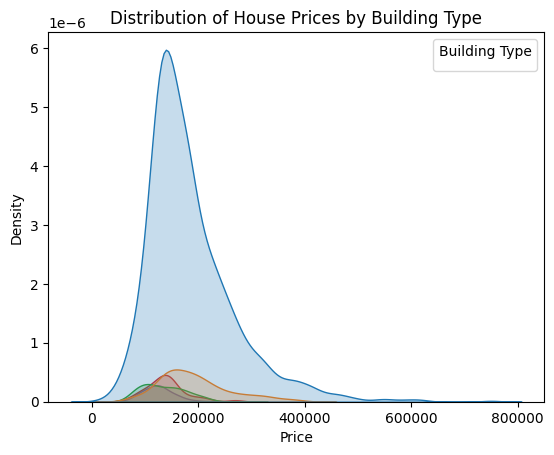

            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [ ]:
#Q7.2 continued
sns.kdeplot(df_ames, x='price', hue='Bldg.Type', fill=True)

plt.title('Distribution of House Prices by Building Type')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Building Type')
plt.show()

print(df_ames.groupby('Bldg.Type')['price'].describe())


0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


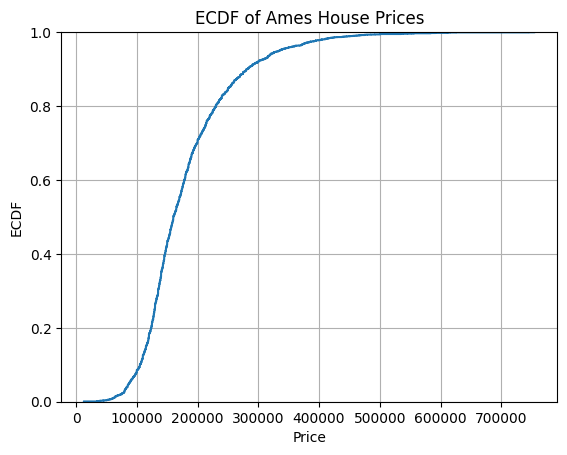

In [251]:
#Q7.3
five_summary = df_ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])
print(five_summary)

sns.ecdfplot(df_ames, x="price")

plt.title("ECDF of Ames House Prices")
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.grid()
plt.show()

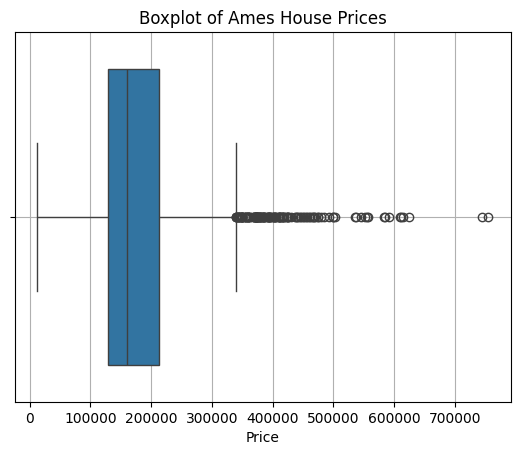

In [ ]:
#Q7.4
sns.boxplot(x=df_ames['price'])

plt.title("Boxplot of Ames House Prices")
plt.xlabel("Price")
plt.grid()
plt.show()

#Yes there are many outliers in the price data as seen in the boxplot.

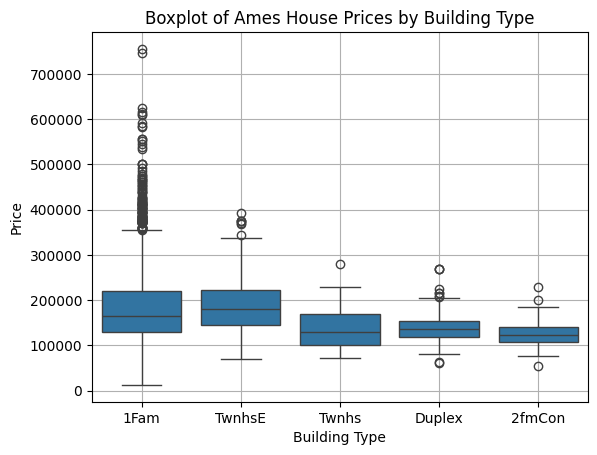

In [ ]:
sns.boxplot(df_ames, x="Bldg.Type", y="price")

plt.title("Boxplot of Ames House Prices by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Price")
plt.grid()
plt.show()

#I see that there are many outliers in 1Fam building types



In [ ]:
#Q7.5
Q1 = df_ames["price"].quantile(0.25)
Q3 = df_ames["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_ames["is_outlier"] = ((df_ames["price"] < lower_bound) | (df_ames["price"] > upper_bound)).astype(int)


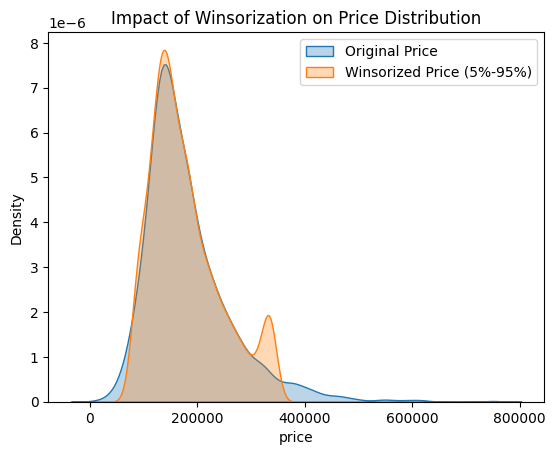

In [255]:
#Q7.6
from scipy.stats.mstats import winsorize


df_ames["price_winsorized"] = winsorize(df_ames["price"], limits=[0.05, 0.05])

sns.kdeplot(df_ames["price"], label='Original Price', fill=True, alpha=0.3)
sns.kdeplot(df_ames["price_winsorized"], label='Winsorized Price (5%-95%)', fill=True, alpha=0.3)
plt.title('Impact of Winsorization on Price Distribution')
plt.legend()
plt.show()

In [ ]:
#there is a increase at around 390000 in the winsorized data.  